# Exploratory Data Analysis (EDA) 

Conduct EDA on the Mexico Price data to examine relationships and examine time series data.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
import os

In [2]:
price_data = pd.read_csv("price_data_cleaned_v3.csv")

In [3]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 23 columns):
Date                  179227 non-null object
Hour                  179227 non-null int64
Zone                  179227 non-null object
LMP                   179227 non-null float64
Energy_LMP            179227 non-null float64
Loss_LMP              179227 non-null float64
Congestion_LMP        179227 non-null float64
TMP                   37986 non-null float64
DATETIME              37986 non-null object
Time                  37986 non-null object
GD Henry Hub          179227 non-null float64
GD Houston ShipChl    178267 non-null float64
GD Waha               179227 non-null float64
DirectMWh             140064 non-null float64
IndirectMWh           140064 non-null float64
TotalMWh              177974 non-null float64
Type                  177974 non-null object
STATION               179227 non-null int64
NAME                  179227 non-null object
LATITUDE              179227

In [4]:
price_data.head(50)

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,DirectMWh,IndirectMWh,TotalMWh,Type,STATION,NAME,LATITUDE,LONGITUDE,HDD,CDD
0,2016-02-05 00:00:00,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaN,NaN,...,NaN,NaN,1667.390,Energy,76393099999,"MONTERREY N.L., MX",25.733333,-100.300000,0.00,0.00
1,2016-02-05 00:00:00,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaN,NaN,...,NaN,NaN,2299.714,Energy,76680099999,"MEXICO CENTRAL D.F., MX",19.400000,-99.183333,0.00,0.00
2,2016-02-05 00:00:00,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,437.740,Energy,76225099999,"CHIHUAHUA CHIH., MX",28.633333,-106.083333,9.24,0.00
3,2016-02-05 00:00:00,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaN,NaN,...,NaN,NaN,1184.613,Energy,76612099999,"GUADALAJARA JAL., MX",20.666667,-103.383333,0.00,0.00
4,2016-02-05 00:00:00,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,1665.630,Energy,76393099999,"MONTERREY N.L., MX",25.733333,-100.300000,6.00,0.00
5,2016-02-05 00:00:00,21,VDM SUR,759.00,745.34,18.14,-4.49,73.94,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,2297.354,Energy,76680099999,"MEXICO CENTRAL D.F., MX",19.400000,-99.183333,0.00,8.94
6,2016-02-05 00:00:00,22,CHIHUAHUA,630.63,740.30,-67.07,-42.60,NaN,NaN,NaN,...,NaN,NaN,435.140,Energy,76225099999,"CHIHUAHUA CHIH., MX",28.633333,-106.083333,0.00,0.00
7,2016-02-05 00:00:00,22,GUADALAJARA,785.35,740.30,31.07,13.99,NaN,NaN,NaN,...,NaN,NaN,1136.742,Energy,76612099999,"GUADALAJARA JAL., MX",20.666667,-103.383333,0.00,0.00
8,2016-02-05 00:00:00,22,MONTERREY,546.64,740.30,-58.11,-135.55,NaN,NaN,NaN,...,NaN,NaN,1609.930,Energy,76393099999,"MONTERREY N.L., MX",25.733333,-100.300000,0.00,0.00
9,2016-02-05 00:00:00,22,VDM SUR,755.29,740.30,20.02,-5.03,NaN,NaN,NaN,...,NaN,NaN,2220.049,Energy,76680099999,"MEXICO CENTRAL D.F., MX",19.400000,-99.183333,0.00,0.00


We don't need station information so I will drop those columns.

In [5]:
price_features = price_data.drop(['STATION', 'NAME'], axis = 1)

In [6]:
price_features.head()

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,GD Houston ShipChl,GD Waha,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD
0,2016-02-05 00:00:00,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaN,NaN,...,1.99,1.94,NaN,NaN,1667.390,Energy,25.733333,-100.300000,0.00,0.0
1,2016-02-05 00:00:00,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaN,NaN,...,1.99,1.94,NaN,NaN,2299.714,Energy,19.400000,-99.183333,0.00,0.0
2,2016-02-05 00:00:00,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2016-02-05 21:00:00,21:00:00,...,1.99,1.94,NaN,NaN,437.740,Energy,28.633333,-106.083333,9.24,0.0
3,2016-02-05 00:00:00,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaN,NaN,...,1.99,1.94,NaN,NaN,1184.613,Energy,20.666667,-103.383333,0.00,0.0
4,2016-02-05 00:00:00,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2016-02-05 21:00:00,21:00:00,...,1.99,1.94,NaN,NaN,1665.630,Energy,25.733333,-100.300000,6.00,0.0


In [7]:
price_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 21 columns):
Date                  179227 non-null object
Hour                  179227 non-null int64
Zone                  179227 non-null object
LMP                   179227 non-null float64
Energy_LMP            179227 non-null float64
Loss_LMP              179227 non-null float64
Congestion_LMP        179227 non-null float64
TMP                   37986 non-null float64
DATETIME              37986 non-null object
Time                  37986 non-null object
GD Henry Hub          179227 non-null float64
GD Houston ShipChl    178267 non-null float64
GD Waha               179227 non-null float64
DirectMWh             140064 non-null float64
IndirectMWh           140064 non-null float64
TotalMWh              177974 non-null float64
Type                  177974 non-null object
LATITUDE              179227 non-null float64
LONGITUDE             179227 non-null float64
HDD                   179

In [8]:
#Turn date to datetime
price_features['Date']= pd.to_datetime(price_features['Date'])
price_features['DATETIME']= pd.to_datetime(price_features['DATETIME'])
price_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 21 columns):
Date                  179227 non-null datetime64[ns]
Hour                  179227 non-null int64
Zone                  179227 non-null object
LMP                   179227 non-null float64
Energy_LMP            179227 non-null float64
Loss_LMP              179227 non-null float64
Congestion_LMP        179227 non-null float64
TMP                   37986 non-null float64
DATETIME              37986 non-null datetime64[ns]
Time                  37986 non-null object
GD Henry Hub          179227 non-null float64
GD Houston ShipChl    178267 non-null float64
GD Waha               179227 non-null float64
DirectMWh             140064 non-null float64
IndirectMWh           140064 non-null float64
TotalMWh              177974 non-null float64
Type                  177974 non-null object
LATITUDE              179227 non-null float64
LONGITUDE             179227 non-null float64
HDD      

In [9]:
price_features.head()

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,GD Houston ShipChl,GD Waha,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD
0,2016-02-05,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaT,NaN,...,1.99,1.94,NaN,NaN,1667.390,Energy,25.733333,-100.300000,0.00,0.0
1,2016-02-05,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaT,NaN,...,1.99,1.94,NaN,NaN,2299.714,Energy,19.400000,-99.183333,0.00,0.0
2,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2016-02-05 21:00:00,21:00:00,...,1.99,1.94,NaN,NaN,437.740,Energy,28.633333,-106.083333,9.24,0.0
3,2016-02-05,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaT,NaN,...,1.99,1.94,NaN,NaN,1184.613,Energy,20.666667,-103.383333,0.00,0.0
4,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2016-02-05 21:00:00,21:00:00,...,1.99,1.94,NaN,NaN,1665.630,Energy,25.733333,-100.300000,6.00,0.0


In [10]:
##Define seasons to use for grouping
def getSeason(date):
    month = int(date.month)
    if (month > 11 or month <= 3):
       return "WINTER"
    elif (month == 4 or month == 5):
       return "SPRING"
    elif (month >=6 and month <= 9):
       return "SUMMER"
    else:
       return "FALL"
price_features['Season'] = price_features['Date'].apply(lambda x: getSeason(x))

In [11]:
#Add in population columns
def getPopulation(zone):
    if (zone == 'GUADALAJARA'):
       return 1385629
    elif (zone == 'CHIHUAHUA'):
       return 1036806
    elif (zone == 'MONTERREY'):
       return 5341171
    elif (zone == 'VDM SUR'):
       return 21804515
price_features['Population'] = price_features['Zone'].apply(lambda x: getPopulation(x))

In [12]:
price_features.head()

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaT,NaN,...,NaN,NaN,1667.390,Energy,25.733333,-100.300000,0.00,0.0,WINTER,5341171
1,2016-02-05,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaT,NaN,...,NaN,NaN,2299.714,Energy,19.400000,-99.183333,0.00,0.0,WINTER,21804515
2,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,437.740,Energy,28.633333,-106.083333,9.24,0.0,WINTER,1036806
3,2016-02-05,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaT,NaN,...,NaN,NaN,1184.613,Energy,20.666667,-103.383333,0.00,0.0,WINTER,1385629
4,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,1665.630,Energy,25.733333,-100.300000,6.00,0.0,WINTER,5341171


In [13]:
temp_price_features = price_features.dropna(subset = ['TMP'], axis = 0)
temp_price_features = temp_price_features.set_index('DATETIME')
temp_price_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,37986.0,1.262110e+01,6.063447e+00,2.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
LMP,37986.0,1.105189e+03,7.704088e+02,0.000000e+00,6.064225e+02,9.028900e+02,1.405540e+03,1.282375e+04
Energy_LMP,37986.0,1.142622e+03,6.820909e+02,-1.000000e-02,6.603200e+02,9.530900e+02,1.462340e+03,1.175489e+04
Loss_LMP,37986.0,-1.704841e+01,1.073544e+02,-1.533570e+03,-6.843000e+01,8.485000e+00,3.838000e+01,1.610670e+03
Congestion_LMP,37986.0,-2.038476e+01,3.259064e+02,-3.356880e+03,-1.184750e+01,0.000000e+00,0.000000e+00,1.050927e+04
TMP,37986.0,6.805621e+01,1.218013e+01,3.200000e+01,5.972000e+01,6.800000e+01,7.664000e+01,1.094000e+02
GD Henry Hub,37986.0,2.669108e+00,7.299844e-01,1.335000e+00,2.280000e+00,2.745000e+00,2.955000e+00,2.360500e+01
GD Houston ShipChl,37740.0,3.043184e+00,1.015087e+01,1.380000e+00,2.225000e+00,2.730000e+00,2.990000e+00,4.000000e+02
GD Waha,37986.0,2.092139e+00,6.084159e+00,-5.790000e+00,1.355000e+00,1.995000e+00,2.610000e+00,2.087900e+02
DirectMWh,28443.0,7.264170e+01,1.453264e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+00,5.753820e+02


In [14]:
temp_price_features.head()

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,Time,GD Henry Hub,...,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
DATETIME,,,,,,,,,,,,,,,,,,,,,
2016-02-05 21:00:00,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,21:00:00,2.045,...,NaN,NaN,437.740,Energy,28.633333,-106.083333,9.24,0.00,WINTER,1036806
2016-02-05 21:00:00,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,21:00:00,2.045,...,NaN,NaN,1665.630,Energy,25.733333,-100.300000,6.00,0.00,WINTER,5341171
2016-02-05 21:00:00,2016-02-05,21,VDM SUR,759.00,745.34,18.14,-4.49,73.94,21:00:00,2.045,...,NaN,NaN,2297.354,Energy,19.400000,-99.183333,0.00,8.94,WINTER,21804515
2016-02-06 03:00:00,2016-02-06,3,CHIHUAHUA,519.41,598.45,-79.05,0.00,47.12,03:00:00,2.085,...,NaN,NaN,353.470,Energy,28.633333,-106.083333,17.88,0.00,WINTER,1036806
2016-02-06 03:00:00,2016-02-06,3,MONTERREY,553.88,598.45,-44.58,0.00,57.56,03:00:00,2.085,...,NaN,NaN,1926.110,Energy,25.733333,-100.300000,7.44,0.00,WINTER,5341171


## Review Summary Statistics

In [15]:
price_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,179227.0,1.250073e+01,6.922357e+00,1.000000e+00,7.000000e+00,1.300000e+01,1.900000e+01,2.500000e+01
LMP,179227.0,1.054365e+03,7.483315e+02,-8.904000e+01,5.670300e+02,8.496500e+02,1.335270e+03,1.315906e+04
Energy_LMP,179227.0,1.098577e+03,6.680454e+02,-1.000000e-02,6.207200e+02,9.107700e+02,1.408700e+03,1.175489e+04
Loss_LMP,179227.0,-1.893369e+01,1.032898e+02,-1.533570e+03,-6.857000e+01,7.180000e+00,3.628000e+01,1.796850e+03
Congestion_LMP,179227.0,-2.527867e+01,3.166450e+02,-4.107670e+03,-1.466000e+01,0.000000e+00,0.000000e+00,1.074447e+04
TMP,37986.0,6.805621e+01,1.218013e+01,3.200000e+01,5.972000e+01,6.800000e+01,7.664000e+01,1.094000e+02
GD Henry Hub,179227.0,2.655008e+00,8.607943e-01,1.335000e+00,2.215000e+00,2.710000e+00,2.940000e+00,2.360500e+01
GD Houston ShipChl,178267.0,3.413529e+00,1.421905e+01,1.380000e+00,2.165000e+00,2.690000e+00,2.975000e+00,4.000000e+02
GD Waha,179227.0,2.276758e+00,8.674037e+00,-5.790000e+00,1.275000e+00,1.910000e+00,2.565000e+00,2.087900e+02
DirectMWh,140064.0,9.033935e+01,1.576113e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.125000e+01,5.753820e+02


#### General Plots to review data over the entire dataset timespan

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F67F6B86A0>,
      dtype=object)

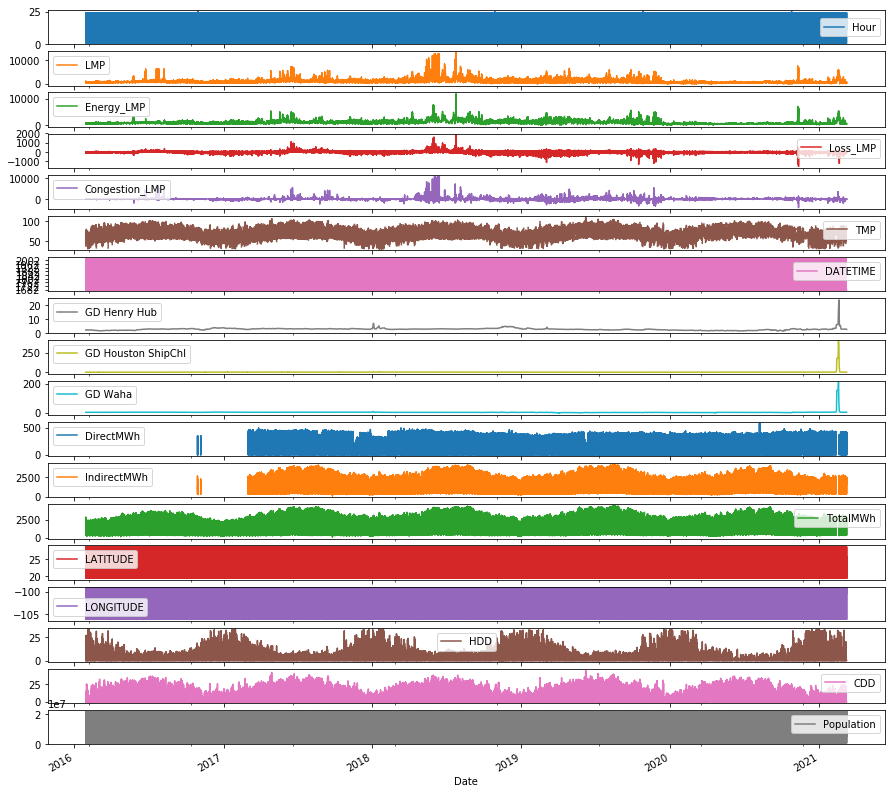

In [16]:
# General Plots to review data over the entire dataset timespan
#price_features.plot(x="Date", figsize=(15,4))
price_features.plot(x="Date", subplots=True, figsize=(15,15))


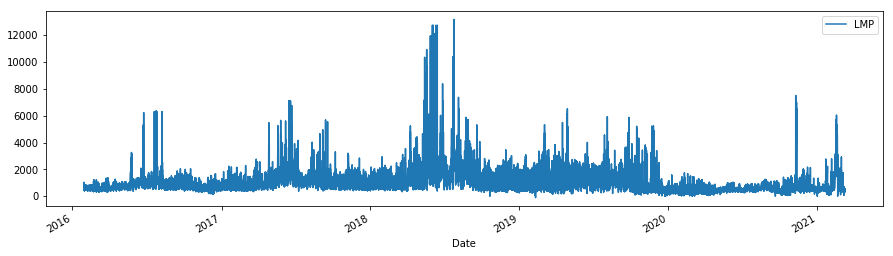

In [17]:
price_features.plot(x="Date", y="LMP", figsize=(15,4))

PLOT 1 - Subplots the different columns. Can tell more from here. The temperature data is incomplete. The pandemic is noticable in the energy columns for the year 2020. The freeze storm that rattled the energy market can be seen in 2021 and is skewing the indeces for the natural gas price plots. <br>
PLOT 2 - Shows the target variable through the data set.

#### Daily Average of Price Components Over Time

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F603DDE128>,
      dtype=object)

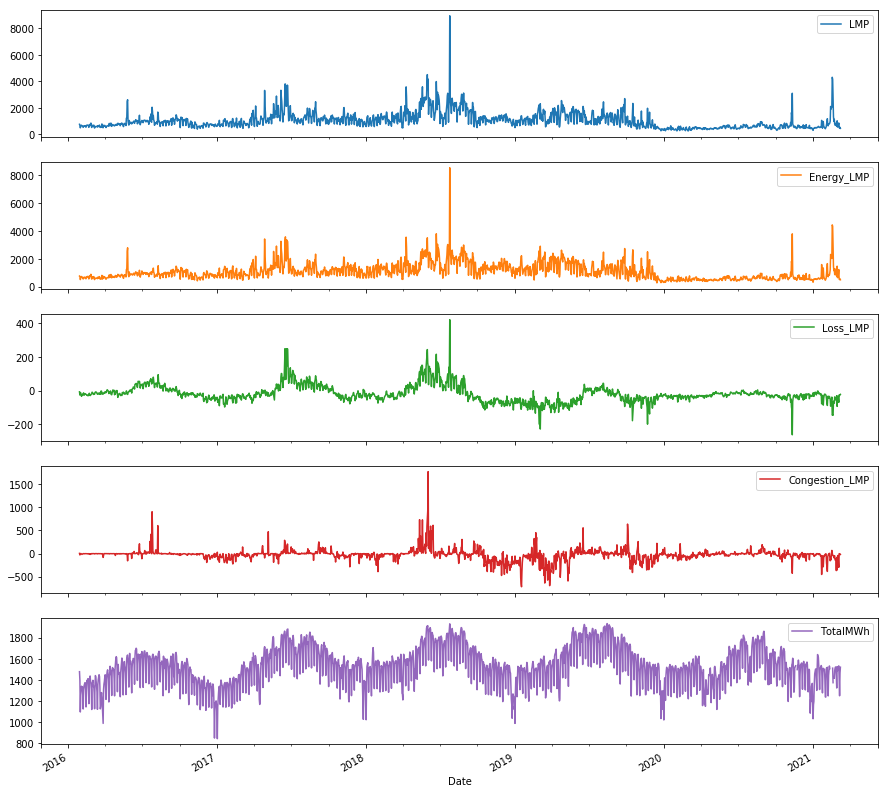

In [18]:
adp = price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
adp.plot(subplots=True, figsize=(15,15))

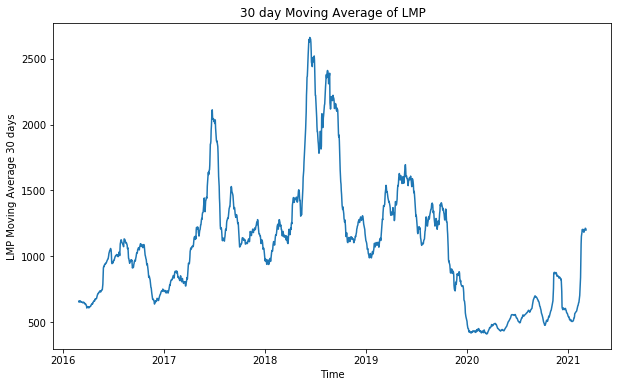

In [19]:
tdp = temp_price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
plt.figure(figsize=(10,6))
plt.plot(tdp['LMP'].rolling(30).mean(),label= 'MA 30 days')
plt.xlabel('Time')
plt.ylabel('LMP Moving Average 30 days')
plt.title('30 day Moving Average of LMP')
plt.show()

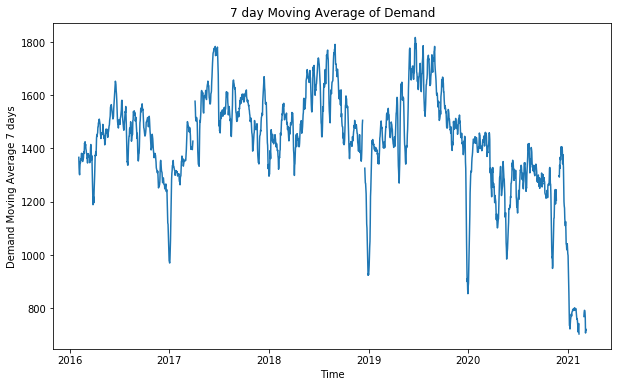

In [20]:
plt.figure(figsize=(10,6))
plt.plot(tdp['TotalMWh'].rolling(7).mean(),label= 'MA 7 days')
plt.xlabel('Time')
plt.ylabel('Demand Moving Average 7 days')
plt.title('7 day Moving Average of Demand')
plt.show()

#### Demand by Season

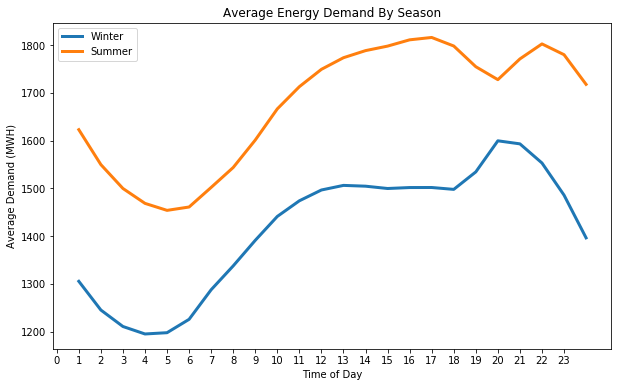

In [21]:
winter_hourly_demand = price_features[(price_features['Season'] == 'WINTER')].groupby('Hour')['TotalMWh'].mean()
summer_hourly_demand = price_features[(price_features['Season'] == 'SUMMER')].groupby('Hour')['TotalMWh'].mean()

plt.figure(figsize=(10,6))
plt.plot(winter_hourly_demand.index, winter_hourly_demand.values, linewidth=3, label='Winter')
plt.legend()
plt.plot(summer_hourly_demand.index, summer_hourly_demand.values, linewidth=3, label='Summer')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Demand (MWH)')
plt.title('Average Energy Demand By Season')
plt.xticks(range(24))
plt.savefig('demandbyhour.png')
plt.show()

#### Degree Days and Price Components

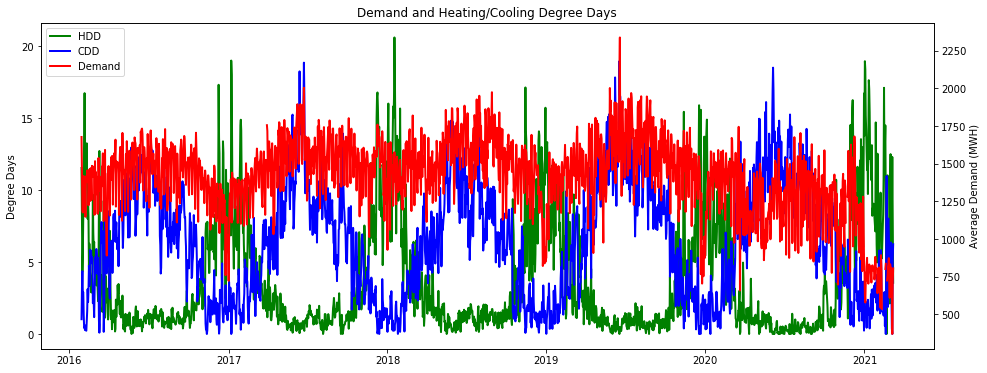

In [22]:
add = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'TotalMWh']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(add.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(add.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(add.TotalMWh, linewidth=2, label='Demand', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Demand (MWH)')
plt.title('Demand and Heating/Cooling Degree Days')
plt.show()

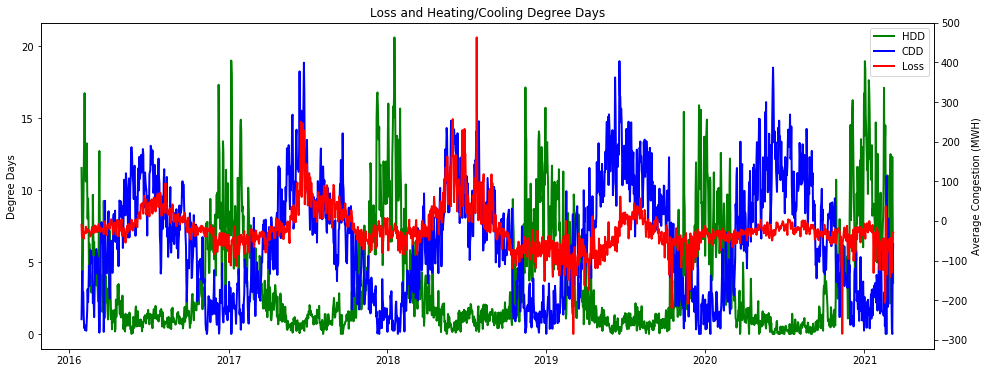

In [23]:
adl = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Loss_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(adl.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(adl.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(adl.Loss_LMP, linewidth=2, label='Loss', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Congestion (MWH)')
plt.title('Loss and Heating/Cooling Degree Days')
plt.show()

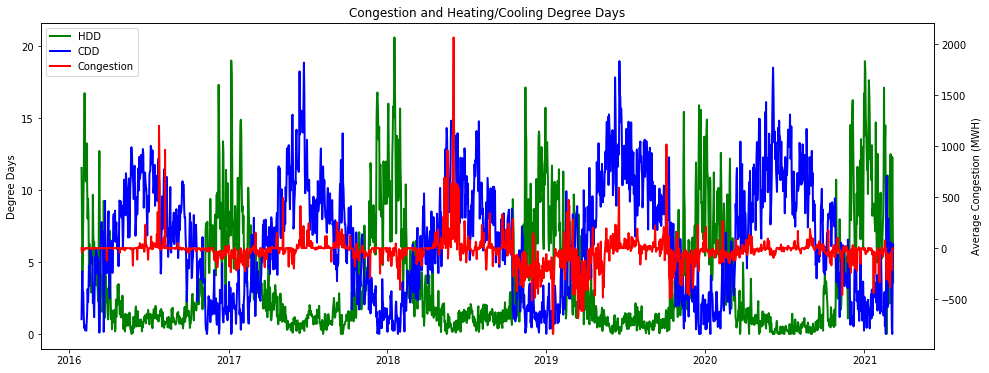

In [24]:
adc = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Congestion_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(adc.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(adc.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(adc.Congestion_LMP, linewidth=2, label='Congestion', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Congestion (MWH)')
plt.title('Congestion and Heating/Cooling Degree Days')
plt.show()

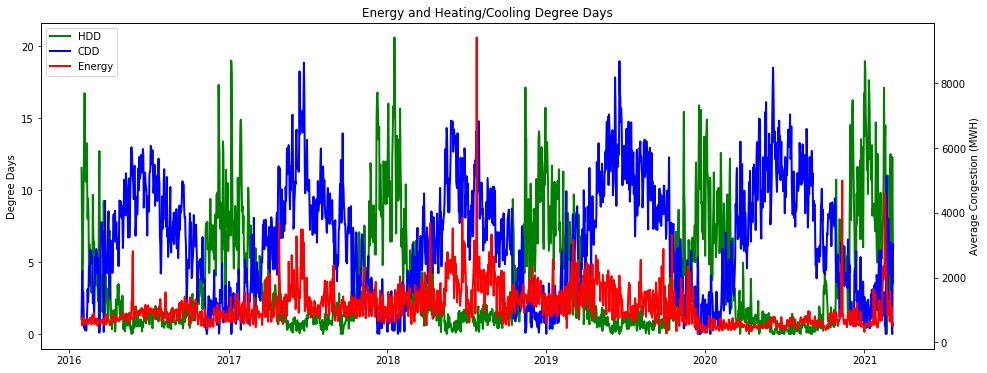

In [25]:
ade = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Energy_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(ade.HDD, linewidth=2, label='HDD', color = 'g')
lns2 = ax1.plot(ade.CDD, linewidth=2, label='CDD', color = 'b')
lns3 = ax2.plot(ade.Energy_LMP, linewidth=2, label='Energy', color ='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Degree Days')
ax2.set_ylabel('Average Congestion (MWH)')
plt.title('Energy and Heating/Cooling Degree Days')
plt.show()

#### Daily Average of Price Components By Hour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F603084908>,
      dtype=object)

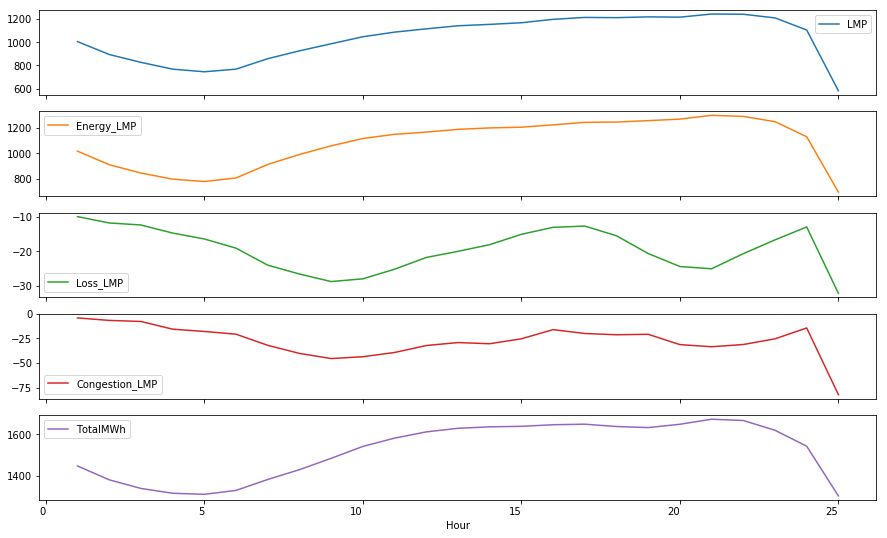

In [26]:
adp = price_features.groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
adp.plot(subplots=True, figsize=(15,10), rot = 0)

25th Hour corresponds to DST and is therefore skewed towards November and March

#### Zone Analysis of Daily Average of Price Components 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F61480EA20>,
      dtype=object)

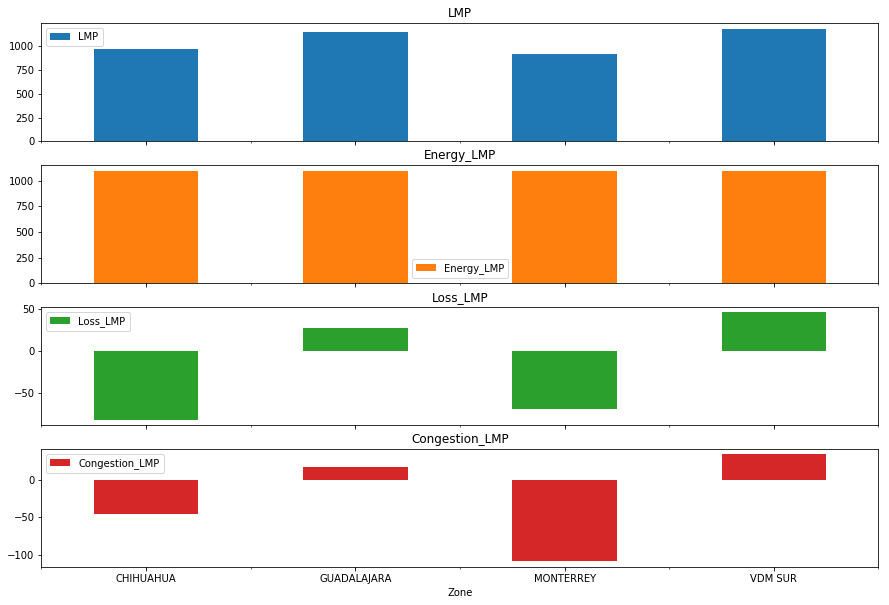

In [27]:
zdp = price_features.groupby('Zone')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP']].mean()
zdp.plot(subplots=True, figsize=(15,10), kind = 'bar', rot = 0)

Here we can see how to Loss and Congestion component of the price are highly influenced by zone.

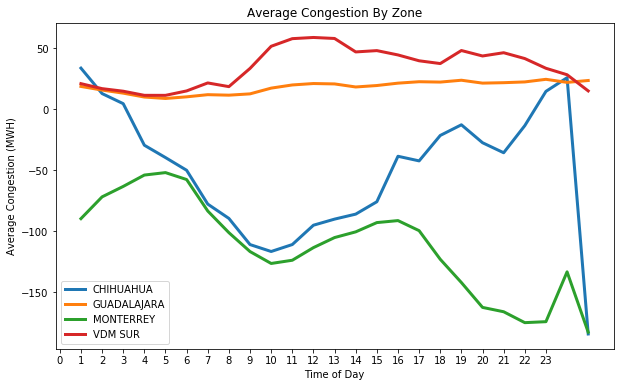

In [28]:
c_hourly = price_features[(price_features['Zone'] == 'CHIHUAHUA')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
g_hourly = price_features[(price_features['Zone'] == 'GUADALAJARA')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
m_hourly = price_features[(price_features['Zone'] == 'MONTERREY')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()
v_hourly = price_features[(price_features['Zone'] == 'VDM SUR')].groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TotalMWh']].mean()

#c_hourly.plot(subplots=True, figsize=(15,10), rot = 0)

plt.figure(figsize=(10,6))
plt.plot(c_hourly.index, c_hourly.Congestion_LMP, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly.index, g_hourly.Congestion_LMP, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly.index, m_hourly.Congestion_LMP, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly.index, v_hourly.Congestion_LMP, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Congestion (MWH)')
plt.title('Average Congestion By Zone')
plt.xticks(range(24))
plt.savefig('Congestionbyzone.png')
plt.show()

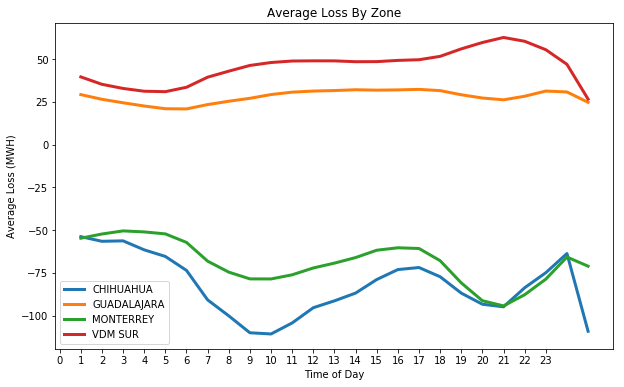

In [29]:
plt.figure(figsize=(10,6))
plt.plot(c_hourly.index, c_hourly.Loss_LMP, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly.index, g_hourly.Loss_LMP, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly.index, m_hourly.Loss_LMP, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly.index, v_hourly.Loss_LMP, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Loss (MWH)')
plt.title('Average Loss By Zone')
plt.xticks(range(24))
plt.savefig('Lossbyzone.png')
plt.show()

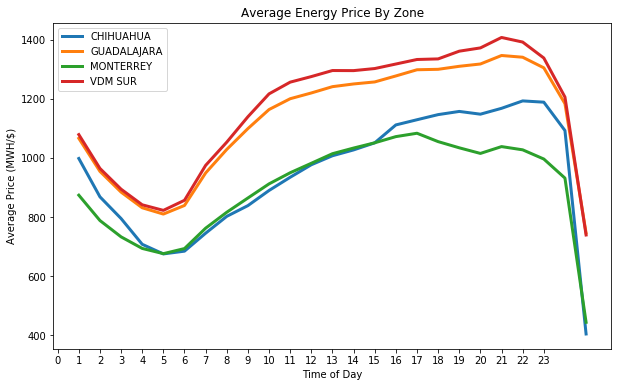

In [30]:
c_hourly_price = price_features[(price_features['Zone'] == 'CHIHUAHUA')].groupby('Hour')['LMP'].mean()
g_hourly_price = price_features[(price_features['Zone'] == 'GUADALAJARA')].groupby('Hour')['LMP'].mean()
m_hourly_price = price_features[(price_features['Zone'] == 'MONTERREY')].groupby('Hour')['LMP'].mean()
v_hourly_price = price_features[(price_features['Zone'] == 'VDM SUR')].groupby('Hour')['LMP'].mean()

plt.figure(figsize=(10,6))
plt.plot(c_hourly_price.index, c_hourly_price.values, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly_price.index, g_hourly_price.values, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly_price.index, m_hourly_price.values, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly_price.index, v_hourly_price.values, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Price (MWH/$)')
plt.title('Average Energy Price By Zone')
plt.xticks(range(24))
plt.savefig('pricebyzone.png')
plt.show()

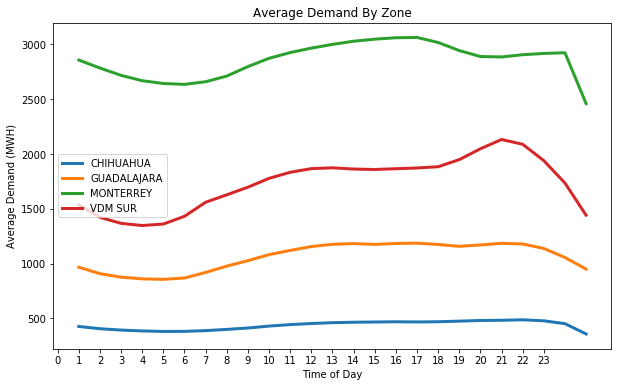

In [31]:
c_hourly_demand = price_features[(price_features['Zone'] == 'CHIHUAHUA')].groupby('Hour')['TotalMWh'].mean()
g_hourly_demand = price_features[(price_features['Zone'] == 'GUADALAJARA')].groupby('Hour')['TotalMWh'].mean()
m_hourly_demand = price_features[(price_features['Zone'] == 'MONTERREY')].groupby('Hour')['TotalMWh'].mean()
v_hourly_demand = price_features[(price_features['Zone'] == 'VDM SUR')].groupby('Hour')['TotalMWh'].mean()

plt.figure(figsize=(10,6))
plt.plot(c_hourly_demand.index, c_hourly_demand.values, linewidth=3, label='CHIHUAHUA')
plt.legend()
plt.plot(g_hourly_demand.index, g_hourly_demand.values, linewidth=3, label='GUADALAJARA')
plt.legend()
plt.plot(m_hourly_demand.index, m_hourly_demand.values, linewidth=3, label='MONTERREY')
plt.legend()
plt.plot(v_hourly_demand.index, v_hourly_demand.values, linewidth=3, label='VDM SUR')
plt.legend()
plt.xlabel('Time of Day')
plt.ylabel('Average Demand (MWH)')
plt.title('Average Demand By Zone')
plt.xticks(range(24))
plt.savefig('Demandbyzone.png')
plt.show()

#### NG Price Analysis 

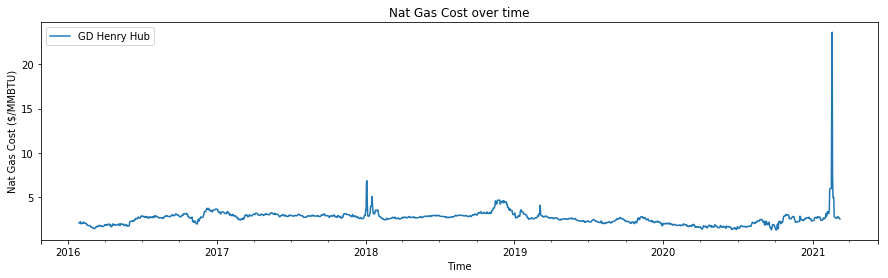

In [32]:
ngdp = price_features.groupby('Date')[['GD Henry Hub']].mean()
ngdp.plot(y="GD Henry Hub", figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Nat Gas Cost ($/MMBTU)')
plt.title('Nat Gas Cost over time')
plt.show()

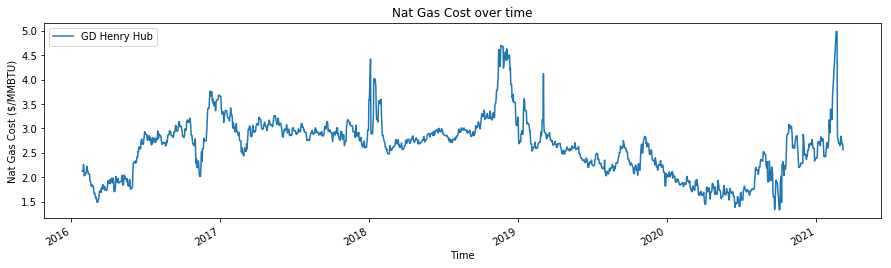

In [33]:
ngdp_rev = ngdp[ngdp['GD Henry Hub'] < 5]
ngdp_rev.plot(y="GD Henry Hub", figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Nat Gas Cost ($/MMBTU)')
plt.title('Nat Gas Cost over time')
plt.show()

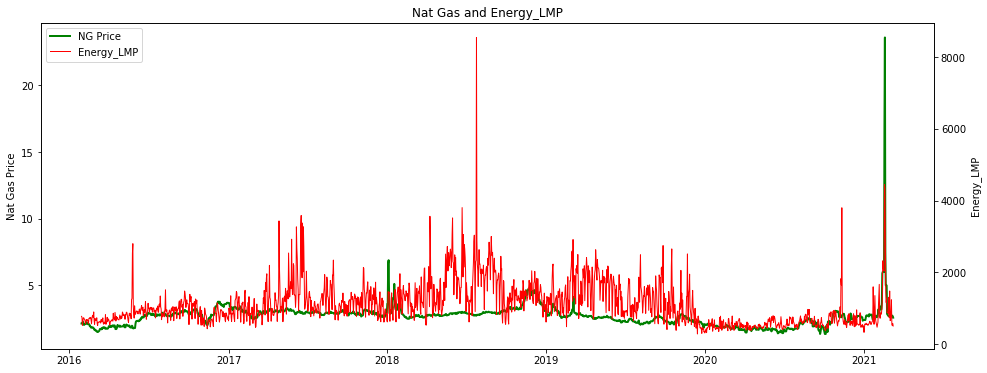

In [34]:
ngedp = price_features.groupby('Date')[['GD Henry Hub', 'Energy_LMP']].mean()

fig, ax1 = plt.subplots(figsize=(16,6))
ax2=ax1.twinx()

lns1 = ax1.plot(ngedp['GD Henry Hub'], linewidth=2, label='NG Price', color = 'g')
lns3 = ax2.plot(ngedp.Energy_LMP, linewidth=1, label='Energy_LMP', color ='r')

lns = lns1+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#ax1.legend(loc = 1)
#ax2.legend(loc = 0)
plt.xlabel('Time of Day')
ax1.set_ylabel('Nat Gas Price')
ax2.set_ylabel('Energy_LMP')
plt.title('Nat Gas and Energy_LMP')
plt.show()

#### Scatter of AVG Temp and Price Components per day

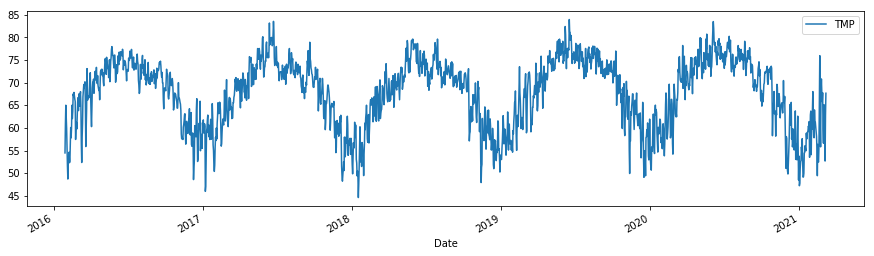

In [35]:
adl = temp_price_features.groupby('Date')[['HDD' ,'CDD', 'Loss_LMP']].mean()
tdp = temp_price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh']].mean()
#tdp.plot(x = 'TMP', y = 'LMP', subplots=True, figsize=(15,10), kind = 'scatter', rot = 0)
tdp.plot(y="TMP", figsize=(15,4))

Note from first go around "It looks like we have some non realistic temperature averages. Let's examine them."<br>
This has since been corrected by removing bad readings from initial weather data set.

In [36]:
tdp.TMP.sort_values(ascending = False).head(5)

Date
2019-06-18    83.960000
2017-06-23    83.550435
2020-06-05    83.505714
2017-06-13    83.187500
2019-06-08    82.415652
Name: TMP, dtype: float64

Top value looks low. Lets take a look at the temps for that date.

In [37]:
filtered_temp = price_features[price_features['TMP'].notnull()]
filtered_temp[filtered_temp['Date'] == '2019-06-18']

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
103557,2019-06-18,3,CHIHUAHUA,1704.09,1670.60,33.48,0.0,86.00,2019-06-18 03:00:00,03:00:00,...,0.00,486.760,486.760,Energy,28.633333,-106.083333,0.0,21.00,SUMMER,1036806
103559,2019-06-18,3,MONTERREY,1597.01,1670.60,-73.59,0.0,84.56,2019-06-18 03:00:00,03:00:00,...,349.69,3282.748,3632.438,Energy,25.733333,-100.300000,0.0,19.56,SUMMER,5341171
103581,2019-06-18,9,CHIHUAHUA,1833.62,1964.24,-130.62,0.0,75.20,2019-06-18 09:00:00,09:00:00,...,0.00,494.354,494.354,Energy,28.633333,-106.083333,0.0,10.20,SUMMER,1036806
103593,2019-06-18,12,CHIHUAHUA,1959.54,2034.35,-74.81,0.0,70.34,2019-06-18 12:00:00,12:00:00,...,0.00,574.289,574.289,Energy,28.633333,-106.083333,0.0,5.34,SUMMER,1036806
103595,2019-06-18,12,MONTERREY,1905.86,2034.35,-128.49,0.0,76.64,2019-06-18 12:00:00,12:00:00,...,395.00,3515.996,3910.996,Energy,25.733333,-100.300000,0.0,11.64,SUMMER,5341171
103605,2019-06-18,15,CHIHUAHUA,2108.98,2125.26,-16.28,0.0,80.24,2019-06-18 15:00:00,15:00:00,...,0.00,606.168,606.168,Energy,28.633333,-106.083333,0.0,15.24,SUMMER,1036806
103607,2019-06-18,15,MONTERREY,2044.78,2125.26,-80.48,0.0,80.24,2019-06-18 15:00:00,15:00:00,...,405.71,3724.470,4130.180,Energy,25.733333,-100.300000,0.0,15.24,SUMMER,5341171
103617,2019-06-18,18,CHIHUAHUA,2262.97,2203.85,59.12,0.0,88.88,2019-06-18 18:00:00,18:00:00,...,0.00,619.315,619.315,Energy,28.633333,-106.083333,0.0,23.88,SUMMER,1036806
103619,2019-06-18,18,MONTERREY,2143.68,2203.85,-60.16,0.0,91.40,2019-06-18 18:00:00,18:00:00,...,430.37,3758.496,4188.866,Energy,25.733333,-100.300000,0.0,26.40,SUMMER,5341171
103629,2019-06-18,21,CHIHUAHUA,2257.51,2239.49,18.02,0.0,94.64,2019-06-18 21:00:00,21:00:00,...,0.00,589.905,589.905,Energy,28.633333,-106.083333,0.0,29.64,SUMMER,1036806


#### Scatter of AVG LMP vs Index Gas Price

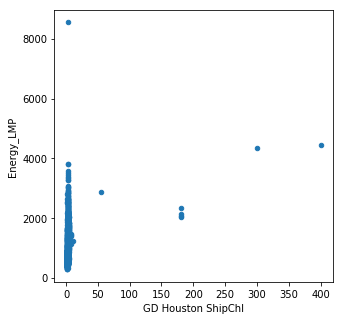

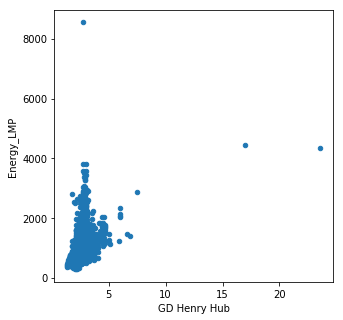

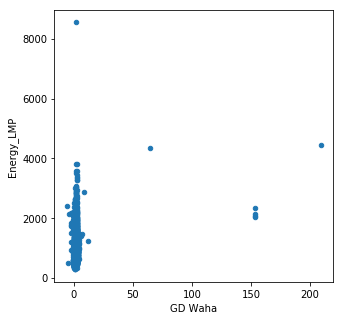

In [38]:
price_index = price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'GD Henry Hub','GD Houston ShipChl','GD Waha']].mean()
price_index.plot(x = 'GD Houston ShipChl', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index.plot(x = 'GD Henry Hub', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index.plot(x = 'GD Waha', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)

Outliers are hiding the relationship. Going to remove any price over $10

In [39]:
price_index_rev = price_index[price_index['GD Henry Hub'] < 10]
price_index_rev = price_index_rev[price_index['GD Houston ShipChl'] < 10]
price_index_rev = price_index_rev[price_index['GD Waha'] < 10]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


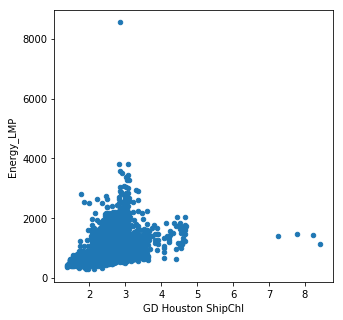

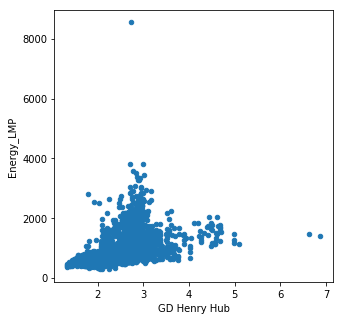

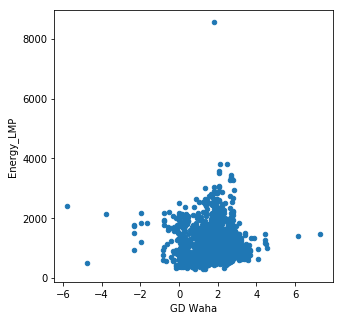

In [40]:
price_index_rev.plot(x = 'GD Houston ShipChl', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index_rev.plot(x = 'GD Henry Hub', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index_rev.plot(x = 'GD Waha', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)

Henry Hub appears to have the strongest correlation and the most realisting prices. Might choose this price index.

#### Correlations 

In [41]:
price_features.corr()

,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,DirectMWh,IndirectMWh,TotalMWh,LATITUDE,LONGITUDE,HDD,CDD,Population
Hour,1.000000,0.185916,0.213606,-0.006726,-0.009085,0.310641,0.000054,-1.889855e-06,-1.403787e-06,-0.009820,0.123121,0.109842,4.746674e-06,2.564082e-06,-0.046100,0.123970,4.275781e-06
LMP,0.185916,1.000000,0.865855,0.396728,0.407154,0.219535,0.301387,1.654466e-01,1.292095e-01,-0.114201,0.109039,0.090802,-1.331481e-01,4.181766e-02,-0.050741,0.101996,8.144249e-02
Energy_LMP,0.213606,0.865855,1.000000,0.075041,-0.087953,0.167029,0.365393,1.935727e-01,1.469750e-01,-0.007066,0.135843,0.126873,-6.312198e-05,6.235807e-05,-0.029901,0.084779,3.224841e-05
Loss_LMP,-0.006726,0.396728,0.075041,1.000000,0.453077,0.155983,-0.044856,-4.573958e-02,-2.378001e-02,-0.288961,0.060332,0.029490,-5.391034e-01,2.597310e-01,-0.072300,0.044278,3.306661e-01
Congestion_LMP,-0.009085,0.407154,-0.087953,0.453077,1.000000,0.118000,-0.043988,-2.622331e-03,3.037299e-03,-0.162054,-0.047215,-0.061542,-1.386832e-01,1.397267e-02,-0.033250,0.047742,8.454329e-02
TMP,0.310641,0.219535,0.167029,0.155983,0.118000,1.000000,-0.153413,-5.425037e-02,-6.492578e-02,0.207781,0.190015,0.215756,1.493756e-01,-2.467544e-02,-0.811001,0.898279,-1.619845e-01
GD Henry Hub,0.000054,0.301387,0.365393,-0.044856,-0.043988,-0.153413,1.000000,6.700409e-01,4.991503e-01,-0.007175,-0.000528,-0.000776,-3.104992e-06,-1.677270e-06,0.059610,-0.030063,-2.796961e-06
GD Houston ShipChl,-0.000002,0.165447,0.193573,-0.045740,-0.002622,-0.054250,0.670041,1.000000e+00,9.113281e-01,-0.002003,-0.001729,-0.000626,-4.410142e-07,-2.382292e-07,0.013555,-0.016148,-3.972634e-07
GD Waha,-0.000001,0.129209,0.146975,-0.023780,0.003037,-0.064926,0.499150,9.113281e-01,1.000000e+00,-0.003173,-0.004192,-0.014568,-1.701067e-07,-9.188911e-08,0.016889,-0.017061,-1.532313e-07
DirectMWh,-0.009820,-0.114201,-0.007066,-0.288961,-0.162054,0.207781,-0.007175,-2.003384e-03,-3.173184e-03,1.000000,0.756768,0.820991,3.234356e-01,4.096420e-01,-0.071634,0.039185,-1.389260e-01


In [42]:
temp_price_features.corr()

,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,DirectMWh,IndirectMWh,TotalMWh,LATITUDE,LONGITUDE,HDD,CDD,Population
Hour,1.000000,0.203083,0.238388,-0.020535,-0.012092,0.310641,-0.012055,0.002121,-0.002491,-0.029614,0.127940,0.120932,-0.008464,0.005897,-0.140065,0.363064,0.014510
LMP,0.203083,1.000000,0.866357,0.416745,0.413418,0.219535,0.272322,0.120569,0.091345,-0.063452,0.155555,0.131097,-0.127607,0.070996,-0.158626,0.211787,0.094287
Energy_LMP,0.238388,0.866357,1.000000,0.104941,-0.079495,0.167029,0.334644,0.143400,0.102746,0.032865,0.170078,0.152058,-0.006328,0.025952,-0.108956,0.169946,0.021714
Loss_LMP,-0.020535,0.416745,0.104941,1.000000,0.436107,0.155983,-0.034870,-0.043783,-0.019074,-0.243596,0.111465,0.086953,-0.507525,0.276841,-0.180100,0.099859,0.313731
Congestion_LMP,-0.012092,0.413418,-0.079495,0.436107,1.000000,0.118000,-0.045151,-0.000732,0.007174,-0.140491,-0.024108,-0.036339,-0.121226,0.022320,-0.087615,0.112068,0.074098
TMP,0.310641,0.219535,0.167029,0.155983,0.118000,1.000000,-0.153413,-0.054250,-0.064926,0.207781,0.190015,0.215756,0.149376,-0.024675,-0.811001,0.898279,-0.161985
GD Henry Hub,-0.012055,0.272322,0.334644,-0.034870,-0.045151,-0.153413,1.000000,0.600255,0.452649,0.020171,0.023704,0.014813,-0.003120,0.004350,0.160511,-0.110698,0.003172
GD Houston ShipChl,0.002121,0.120569,0.143400,-0.043783,-0.000732,-0.054250,0.600255,1.000000,0.901348,-0.007162,-0.010374,-0.009294,0.006356,-0.028514,0.067575,-0.030968,-0.024985
GD Waha,-0.002491,0.091345,0.102746,-0.019074,0.007174,-0.064926,0.452649,0.901348,1.000000,-0.000408,-0.007457,-0.013698,0.008417,-0.026983,0.076401,-0.040486,-0.023623
DirectMWh,-0.029614,-0.063452,0.032865,-0.243596,-0.140491,0.207781,0.020171,-0.007162,-0.000408,1.000000,0.740888,0.804845,0.260097,0.407238,-0.124448,0.218422,-0.095274


#### Correlation Heat Map

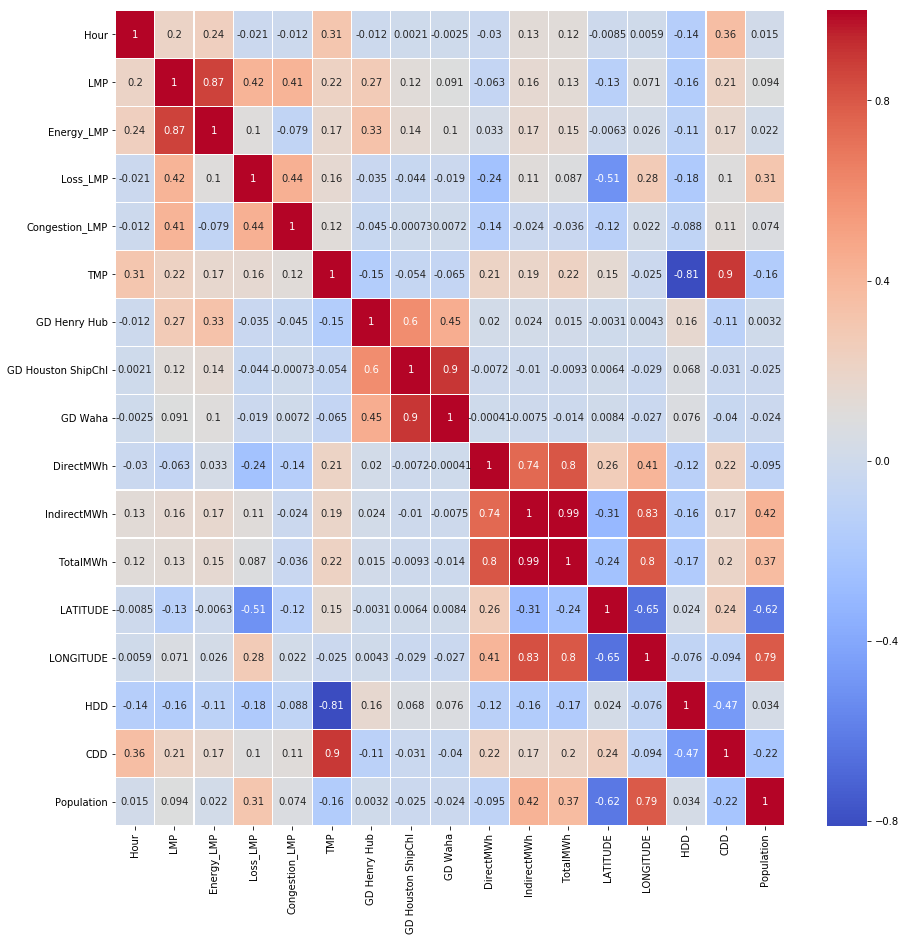

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(temp_price_features.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

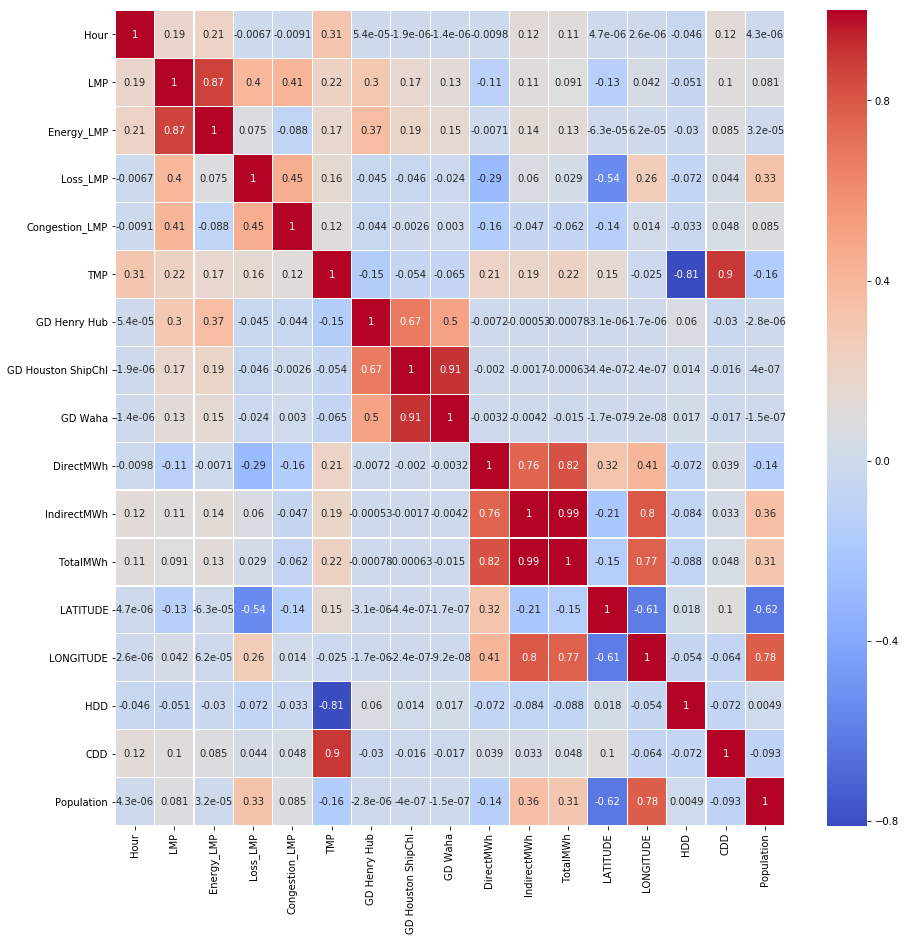

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(price_features.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

#### Pairplot

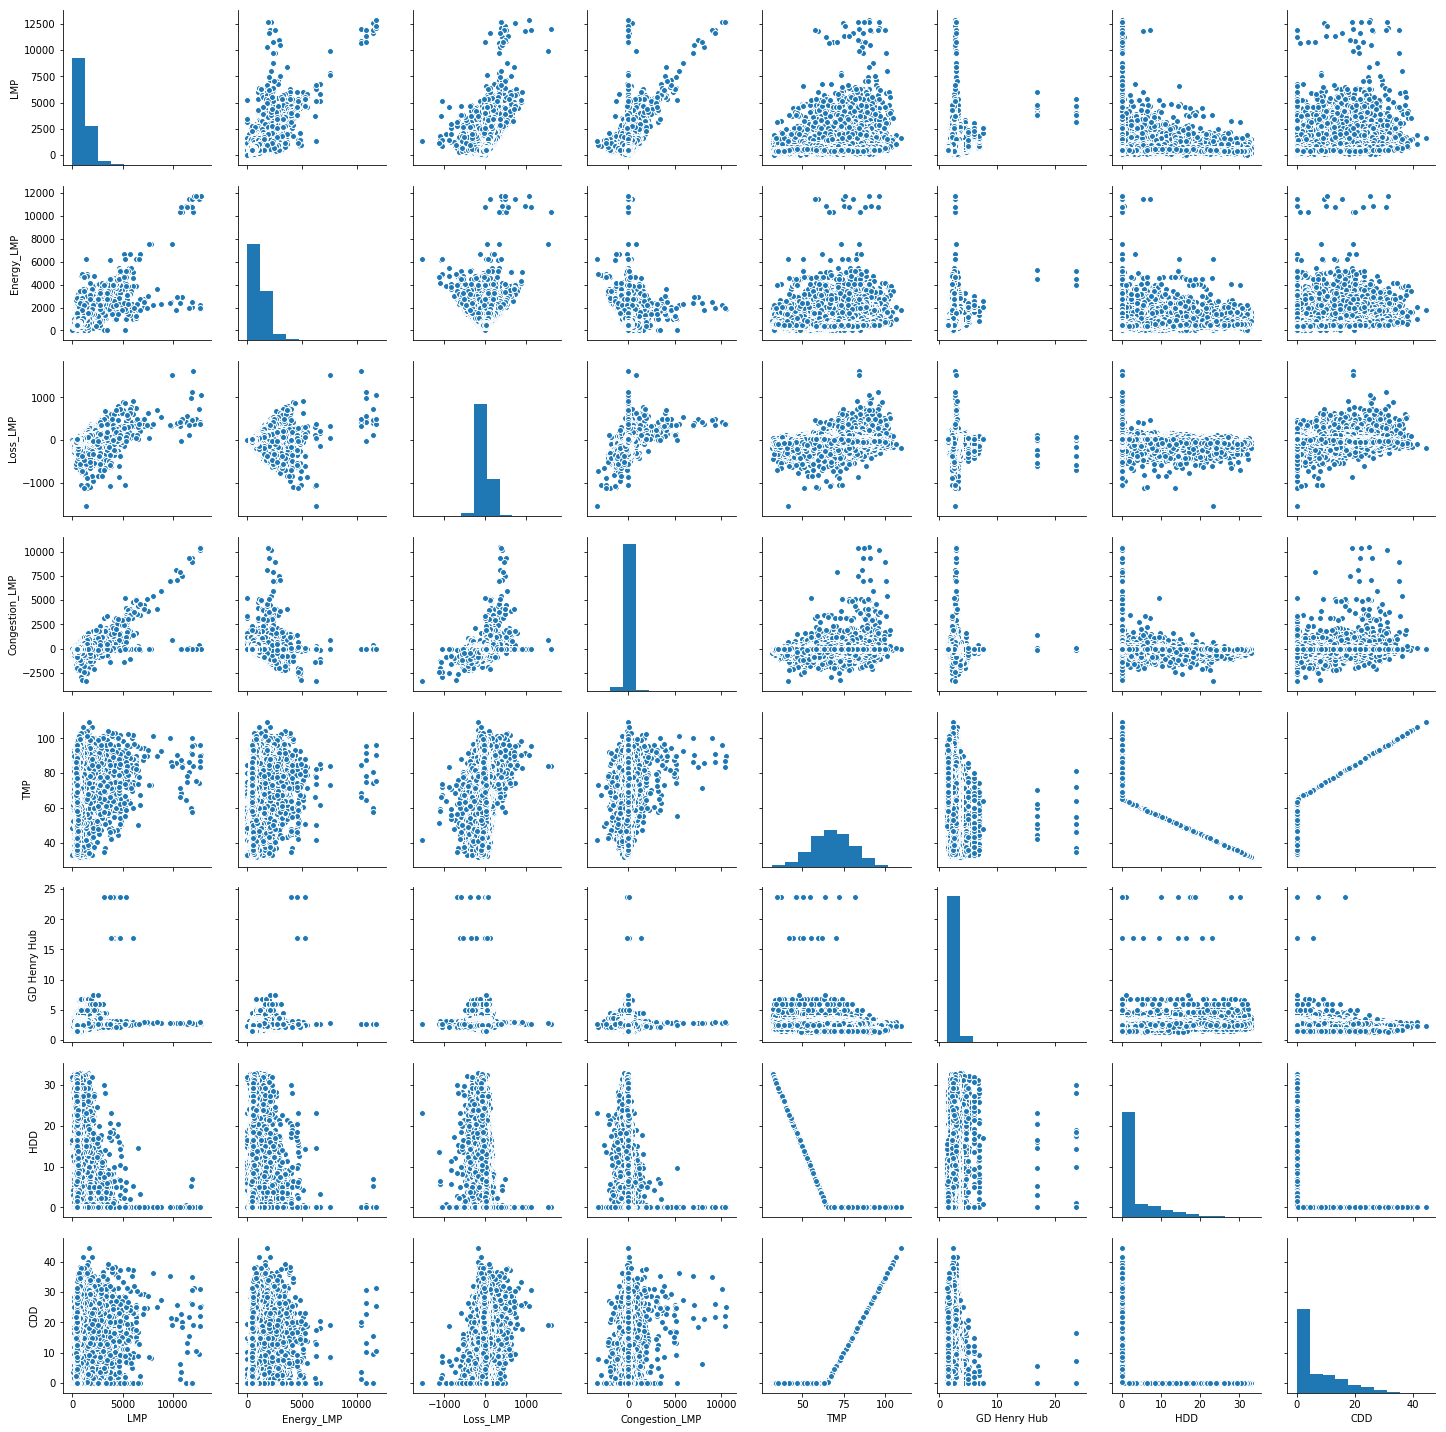

In [45]:
pairplot_df = temp_price_features.drop(['GD Houston ShipChl','TotalMWh', 'GD Waha', 'DirectMWh', 'IndirectMWh', 'LATITUDE', 'LONGITUDE','Population', 'Hour'], axis = 1)
g = sns.pairplot(pairplot_df)

For some reason, demand is not working when included in pairplot.

#### Scatter Plots of Demand vs Price 

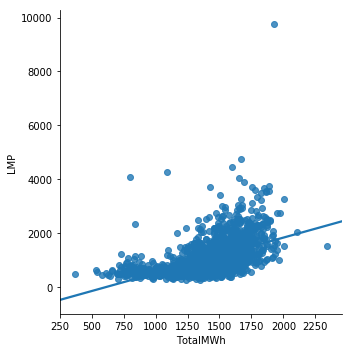

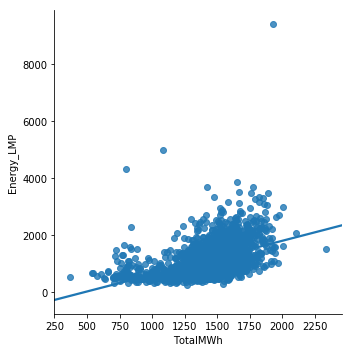

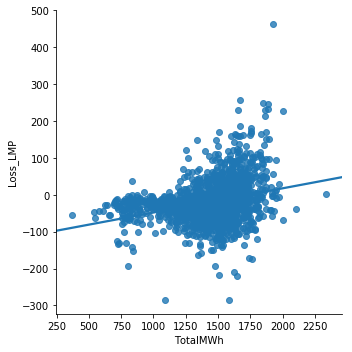

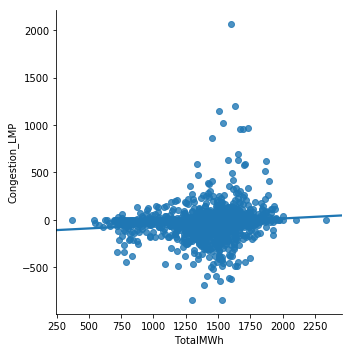

In [46]:
demand_price = temp_price_features.groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
#demand_price.plot(x = 'TotalMWh', y = 'LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#demand_price.plot(x = 'TotalMWh', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#demand_price.plot(x = 'TotalMWh', y = 'Loss_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
#demand_price.plot(x = 'TotalMWh', y = 'Congestion_LMP', figsize=(5,5), kind = 'scatter', rot = 0)

_ = sns.lmplot(x='TotalMWh', y='LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TotalMWh', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TotalMWh', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TotalMWh', y='Congestion_LMP', data=demand_price, ci=None)

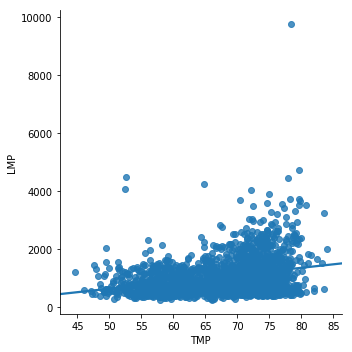

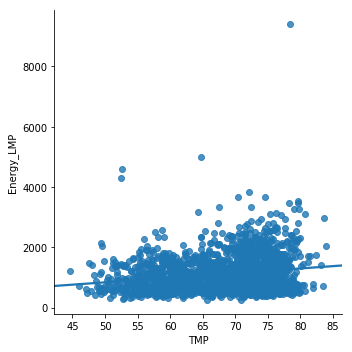

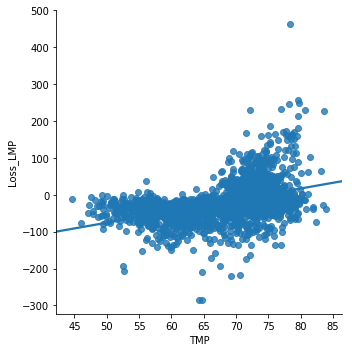

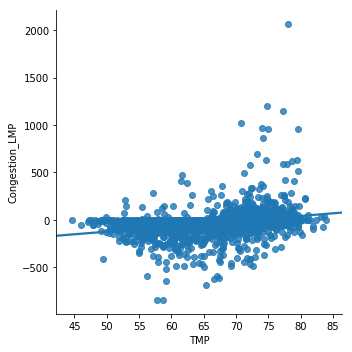

In [47]:
_ = sns.lmplot(x='TMP', y='LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TMP', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TMP', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='TMP', y='Congestion_LMP', data=demand_price, ci=None)

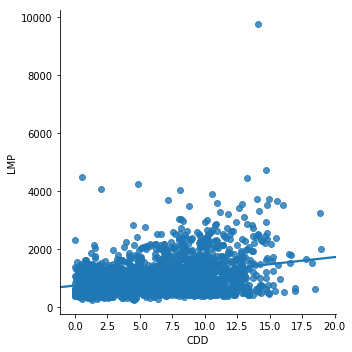

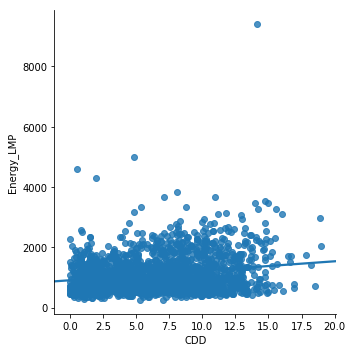

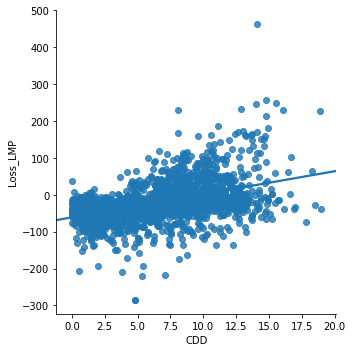

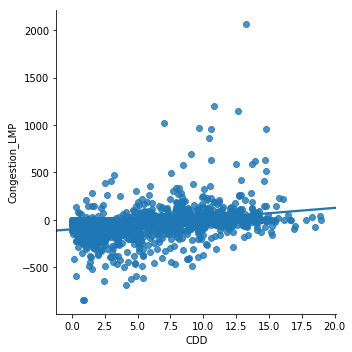

In [49]:
_ = sns.lmplot(x='CDD', y='LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='CDD', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='CDD', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='CDD', y='Congestion_LMP', data=demand_price, ci=None)

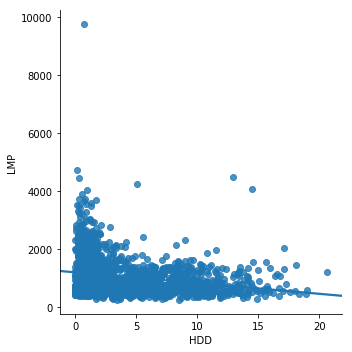

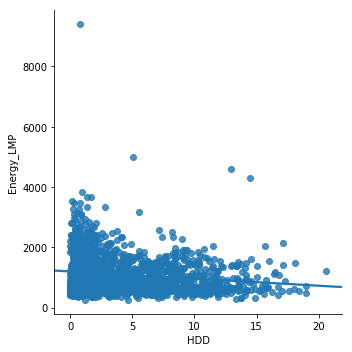

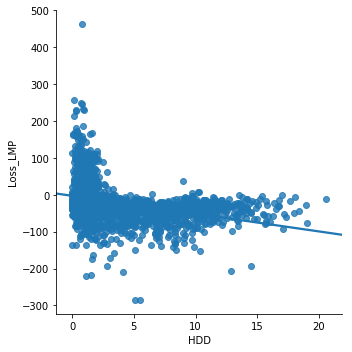

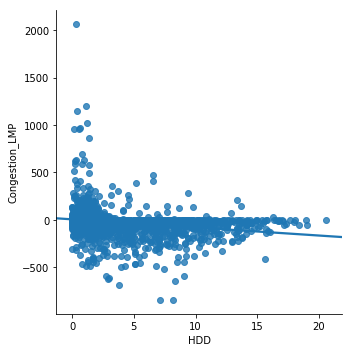

In [50]:
_ = sns.lmplot(x='HDD', y='LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='HDD', y='Energy_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='HDD', y='Loss_LMP', data=demand_price, ci=None)
_ = sns.lmplot(x='HDD', y='Congestion_LMP', data=demand_price, ci=None)

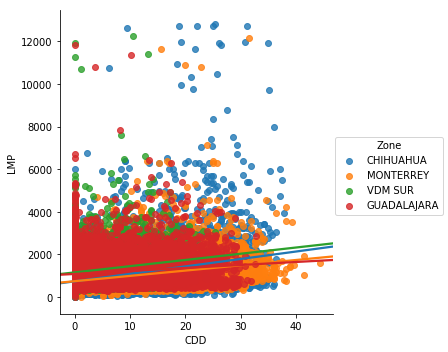

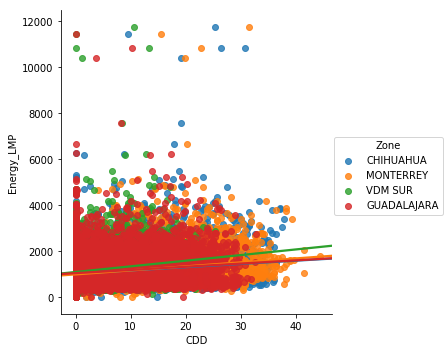

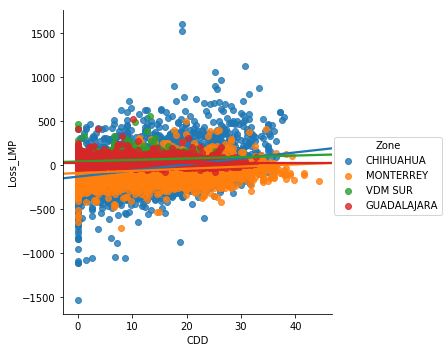

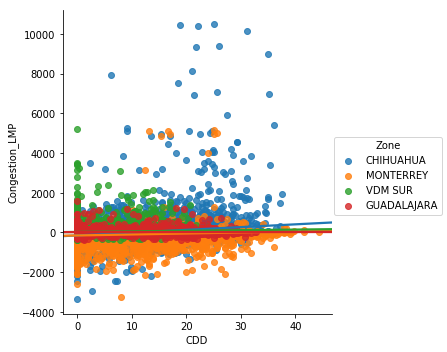

In [51]:
chi = temp_price_features[(temp_price_features['Zone'] == 'CHIHUAHUA')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
guad = temp_price_features[(temp_price_features['Zone'] == 'GUADALAJARA')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
mont = temp_price_features[(temp_price_features['Zone'] == 'MONTERREY')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()
vdm = temp_price_features[(temp_price_features['Zone'] == 'VDM SUR')].groupby('Date')['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP', 'HDD', 'CDD', 'TotalMWh'].mean()

#fig, axes = plt.subplots(2, 2, figsize=(18, 10))

#fig.suptitle('Chihuahua CDD vs LMP Components')

_ = sns.lmplot( x='CDD', y='LMP', data=temp_price_features,hue='Zone',ci=None)
_ = sns.lmplot( x='CDD', y='Energy_LMP', data=temp_price_features,hue='Zone',ci=None)
_ = sns.lmplot( x='CDD', y='Loss_LMP', data=temp_price_features,hue='Zone',ci=None)
_ = sns.lmplot( x='CDD', y='Congestion_LMP', data=temp_price_features,hue='Zone',ci=None)

## Summary

Through EDA, I made the following observations: <br>
$\;\;\;\;\;\;$    Noticed an error in Temp data <br>
$\;\;\;\;\;\;$    Observed the impact of hour of the day on price<br>
$\;\;\;\;\;\;$    Noticed that zone mainly effects the Congestion and Loss components of the price<br>
$\;\;\;\;\;\;$    Plotted the correlation between TEMP and LMP<br>
$\;\;\;\;\;\;$    Plotted the correlation between Price Index and LMP with outliers removed<br>
$\;\;\;\;\;\;$    Plotted Correlation Heat map and Pairplots.<br>

Using market knowledge, I have discovered that there was a methodology change in price calculation in 2017. 2016 data may be obsolete. This methodology change is shown in the time series LMP plot. The effect of the Coronavirus pandemic is also clear in this plot. Not sure if I want to use these time frames.  

In [52]:
# save the data to a new csv file
datapath = r"C:\Users\Zach Barrera\Documents\Zach\Springboard\Springboard\MexicoPowerPrices"
datapath_price_data = os.path.join(datapath, 'price_features.csv')
datapath_price_data_temp = os.path.join(datapath, 'temp_price_features.csv')
if not os.path.exists(datapath_price_data):
    price_features.to_csv(datapath_price_data, index=False)
if not os.path.exists(datapath_price_data_temp):
    temp_price_features.to_csv(datapath_price_data_temp, index=False)